In [79]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import RDistModel, PSF
from colicoords import CellListPlot, save, load, SynthCellList, CellPlot, Cell
from colicoords.iplot import iter_subplots, IterCellPlot
from tqdm import tqdm_notebook
import numpy as np

In [42]:
lengths = np.random.normal(40, 5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0095, 100)

<IPython.core.display.Javascript object>


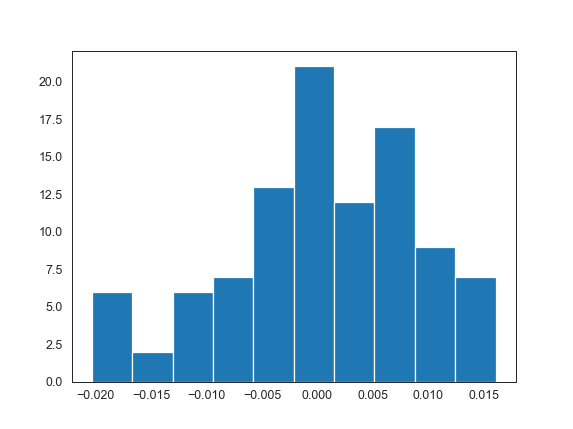

In [43]:
plt.figure()
h = plt.hist(curvatures)

In [34]:
cell_list = SynthCellList(lengths, radii, curvatures)

<IPython.core.display.Javascript object>


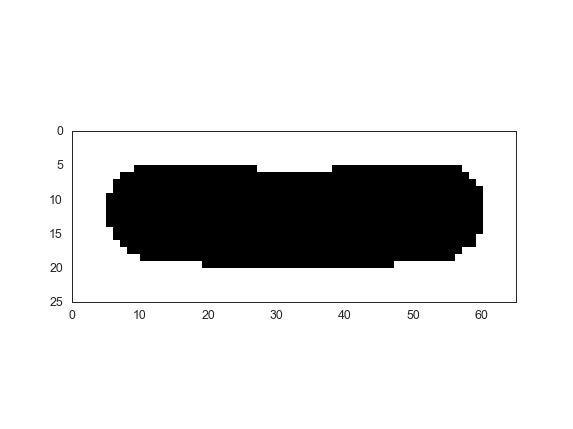

In [35]:
plt.figure()
cp = CellPlot(cell_list[10])
cp.imshow('binary')

In [56]:
lengths = np.random.normal(40, 5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

cell_list = SynthCellList(lengths, radii, curvatures)

for cell in tqdm_notebook(cell_list):
    num = 1#int(np.random.random_integers(4, 8))
    cell.add_storm_membrane(num, 0.9*cell.coords.r, r_std=0.1*cell.coords.r)

In [57]:
sigma_value = 1.54

for cell in cell_list:
    xmax = cell.data.shape[1]
    ymax = cell.data.shape[0]
    step = 1
    xi = np.arange(step / 2, xmax, step)
    yi = np.arange(step / 2, ymax, step)

    x_coords = np.repeat(xi, len(yi)).reshape(len(xi), len(yi)).T
    y_coords = np.repeat(yi, len(xi)).reshape(len(yi), len(xi))
    x, y = cell.data.data_dict['storm']['x'], cell.data.data_dict['storm']['y']
    
    img = np.zeros_like(x_coords)
    intensities = np.ones_like(x)
    sigma = np.ones_like(x)*sigma_value
    for _sigma, _int, _x, _y in zip(sigma, intensities, x, y):
        img += _int * np.exp(-(((_x - x_coords) / _sigma) ** 2 + ((_y - y_coords) / _sigma) ** 2) / 2)
        
    cell.data.add_data(img, 'fluorescence')

In [161]:
-3.552713678800501e-15 // 360

-1.0

In [157]:
360.0 % 360

0.0

<IPython.core.display.Javascript object>


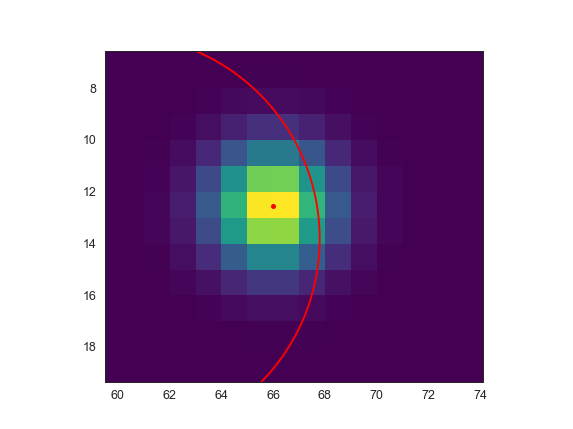

In [58]:
fig, axes = iter_subplots()
cp = IterCellPlot(cell_list)
cp.imshow('fluorescence')
cp.plot_outline()
cp.plot_storm(method='plot')
fig.display()

In [135]:
save('test_single_spot_storm.hdf5', cell_list[:10])

In [74]:
cell = cell_list[0]
flu = cell.data.data_dict['fluorescence']
storm = cell.data.data_dict['storm']
x, y = storm['x'], storm['y']
fl = flu.copy()
fl[fl < 0.1] = 0


x_fl = np.sum(cell.coords.x_coords*flu) / np.sum(flu)
y_fl = np.sum(cell.coords.y_coords*flu) / np.sum(flu)


In [73]:
x, y

(STORMTable([59.01039578]), STORMTable([11.57007865]))

In [75]:
x_fl, y_fl

(FluorescenceImage(59.01038103), FluorescenceImage(11.57007865))

In [156]:
data_r = cell_list[0].data.copy()

data_r = data_r.rotate(40)
flu = data_r.data_dict['fluorescence']
storm = data_r.data_dict['storm']
x, y = storm['x'], storm['y']

nc = Cell(data_r, init_coords=True)
x_fl = np.sum(nc.coords.x_coords*flu) / np.sum(flu)
y_fl = np.sum(nc.coords.y_coords*flu) / np.sum(flu)

print(x[0], x_fl, n_equal(x[0], x_fl))
print(y[0], y_fl, n_equal(y[0], y_fl))


57.693898476331995 57.45423608683906 0
46.79434570644498 46.71127863124167 1


In [120]:
def n_equal(d1, d2):
    i = 0
    while i < 50:
        if d1 // 1 != d2 // 1:
            break
        i += 1
        d1 = d1 * 10 % 10
        d2 = d2 * 10 % 10
        
    return i - 1

In [121]:
n_equal(2.000002, 2.000002)

49

In [108]:
6.989604218533273 * 10 % 10 // 1

9.0

In [103]:
6.989604218533273 // 1

6.0

In [148]:
print(x, x_fl)
print(y, y_fl)

[6.93946926] 6.936427093590804
[19.84954649] 19.672086522412613


In [140]:
from symfit import Fit, Parameter, Variable, exp

In [144]:
def make_model(x_mu_val, y_mu_val):

    sig_x = 1.54
    sig_y = 1.54
    x_mu = Parameter(name='x_mu', value=x_mu_val)
    y_mu = Parameter(name='y_mu', value=y_mu_val)
    b = Parameter(name='b', value=200)
    x_var = Variable(name='x_var')
    y_var = Variable(name='y_var')
    z_var = Variable(name='z_var')

    model = {z_var: exp(-( ((x_var-x_mu)**2/(2*sig_x**2)) + ((y_var-y_mu)**2 / (2*sig_y**2)) )) + b}
    return model

In [145]:
xx, yy = nc.coords.x_coords, nc.coords.y_coords

model = make_model(x, y)
fit = Fit(model, x_var=xx, y_var=yy, z_var=flu)
res = fit.execute()

In [147]:
print(res)


Parameter Value        Standard Deviation
b         2.728664e-07 2.052898e-06
x_mu      6.936160e+00 7.696742e-05
y_mu      1.967199e+01 7.696743e-05
Fitting status message: Optimization terminated successfully.
Number of iterations:   12
Regression Coefficient: 0.9999972062060312



<IPython.core.display.Javascript object>


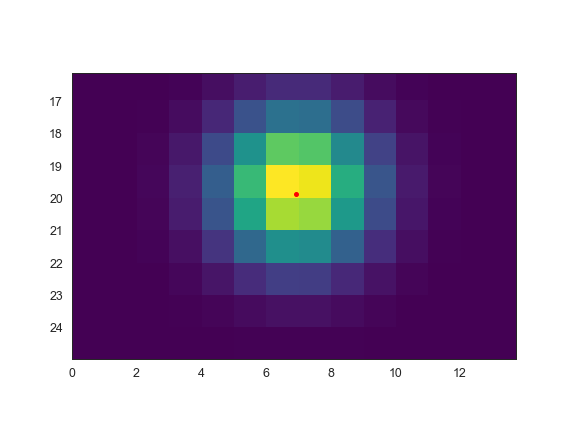

In [138]:
plt.figure()
cp = CellPlot(nc)
cp.imshow('fluorescence')
cp.plot_storm()

<IPython.core.display.Javascript object>


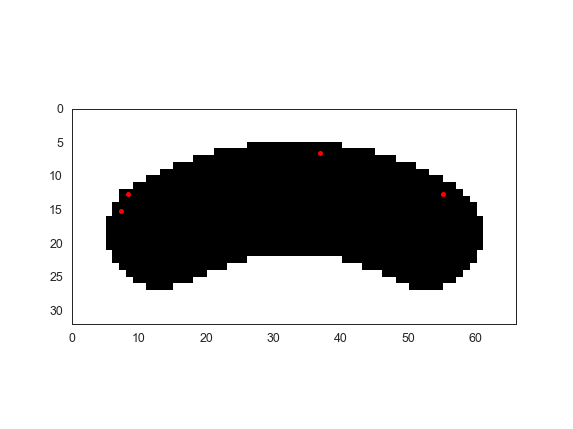

In [51]:
plt.figure()
cp = CellPlot(cell_list[3])
cp.imshow('fluorescence')
cp.imshow('binary')
cp.plot_storm(method='plot')

In [75]:
save('fake_data_new.hdf5', cell_list)